<div style="direction: rtl; text-align: center; background-color: #f8f9fa; padding: 20px; border-radius: 10px; border: 1px solid #e9ecef;">
    <h1 style="color: #2c3e50; font-weight: bold;"> פרויקט: חיזוי חומרת תאונות דרכים</h1>
    <h3 style="color: #7f8c8d; margin-top: 0;">קורס: נושאים מתקדמים בלמידת מכונה</h3>
    <hr style="border: 1px solid #d1d8e0; width: 50%; margin-left: auto; margin-right: auto;">
    <p style="font-size: 16px; margin-bottom: 5px; text-align: center;">
        <strong> מגישים:</strong> אוראל חגי ודוד תורגמן
    </p>
    <p style="font-size: 16px; text-align: center;">
        <strong> מרצה:</strong> חן חגג
    </p>
</div>

In [929]:
import pandas as pd
import numpy as np

In [930]:
df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")
df.shape

C:\Users\User\AppData\Local\Temp\ipykernel_10472\1300577577.py:1: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")


(205073, 39)

In [931]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205073 entries, 0 to 205072
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  205073 non-null  object 
 1   Local Case Number              205073 non-null  object 
 2   Agency Name                    205073 non-null  object 
 3   ACRS Report Type               205073 non-null  object 
 4   Crash Date/Time                205073 non-null  object 
 5   Route Type                     184999 non-null  object 
 6   Road Name                      181885 non-null  object 
 7   Cross-Street Name              168250 non-null  object 
 8   Off-Road Description           19034 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6670 non-null    object 
 11  Collision Type                 204488 non-null  object 
 12  Weather                       

In [932]:
df.head(11)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,MCP3126006X,250037402,MONTGOMERY,Injury Crash,08/21/2025 05:21:00 PM,Maryland (State) Route,NaN,NaN,NaN,NaN,...,Northbound,40,No,No,2013,KIA,SOUL,39.219796,-77.257416,"(39.219796, -77.25741635)"
1,MCP2349001B,250037516,MONTGOMERY,Property Damage Crash,08/22/2025 10:44:00 AM,Interstate (State),EISENHOWER MEMORIAL HWY,NaN,NaN,NaN,...,Northbound,55,No,No,0,NaN,NaN,39.180181,-77.250657,"(39.18018079, -77.25065714)"
2,MCP296500BC,250033157,MONTGOMERY,Property Damage Crash,07/25/2025 11:55:00 AM,Bicycle Route,NaN,NEW HAMPSHIRE AVE (SB/L) NORBECK RD (WB/L) SPE...,NaN,NaN,...,Westbound,40,No,No,2023,LEXUS,RX,39.121219,-76.988905,"(39.12121898, -76.98890509)"
3,MCP2159003K,250037509,MONTGOMERY,Property Damage Crash,08/22/2025 10:36:00 AM,Maryland (State) Route,NaN,NaN,NaN,NaN,...,Southbound,30,No,No,2003,TOYOTA,SIENNA,39.207931,-77.141480,"(39.20793083, -77.1414795)"
4,MCP312900D6,250034573,MONTGOMERY,Property Damage Crash,08/03/2025 02:10:00 PM,NaN,NaN,NaN,Parking Lot Way PARKING LOT OF 2741 UNI...,NaN,...,Not On Roadway,0,No,No,2023,SUBARU,IMPREZA,39.039662,-77.057238,"(39.03966248, -77.05723843)"
5,MCP284600BN,250037004,MONTGOMERY,Injury Crash,08/19/2025 09:50:00 AM,County Route,GRAND PRE RD,NaN,NaN,NaN,...,Northbound,25,No,No,2016,MAZDA,CX-5,39.092734,-77.076470,"(39.09273383, -77.07647)"
6,MCP2968005X,250037708,MONTGOMERY,Injury Crash,08/23/2025 11:50:00 AM,Maryland (State) Route,ROCKVILLE PIKE (SB/L),NaN,NaN,NaN,...,NaN,0,No,No,2025,MAZDA,CX-90,39.058466,-77.121265,"(39.05846583, -77.12126533)"
7,MCP3168008H,250037462,MONTGOMERY,Property Damage Crash,08/21/2025 10:45:00 PM,Bicycle Route,NaN,NaN,NaN,NaN,...,Westbound,25,No,No,2021,TOYOTA,VENZA,39.056209,-77.119080,"(39.0562091, -77.11907977)"
8,MCP3068006J,250037227,MONTGOMERY,Property Damage Crash,08/20/2025 03:15:00 PM,Other Public Roadway,ALLEY,NaN,NaN,NaN,...,Northbound,10,No,No,2022,FORD,F-650,38.988083,-77.094093,"(38.98808273, -77.09409312)"
9,MCP137801DC,250034694,MONTGOMERY,Property Damage Crash,08/04/2025 03:47:00 PM,Maryland (State) Route,GEORGIA AVE (SB/L),OLNEY LAYTONSVILLE RD,NaN,NaN,...,Eastbound,35,No,No,2018,FORD,TRANSIT CONNECT,39.153220,-77.067015,"(39.15322038, -77.06701504)"


## <span style="color:red">מכאן ואילך בכל הפרויקט נעשה שימוש בצאט ובגימיני-בחלקים גדולים בעיקר בסינטקס</span>
### <span style="color:red">###CODE BY GPT & GEMINI###</span>

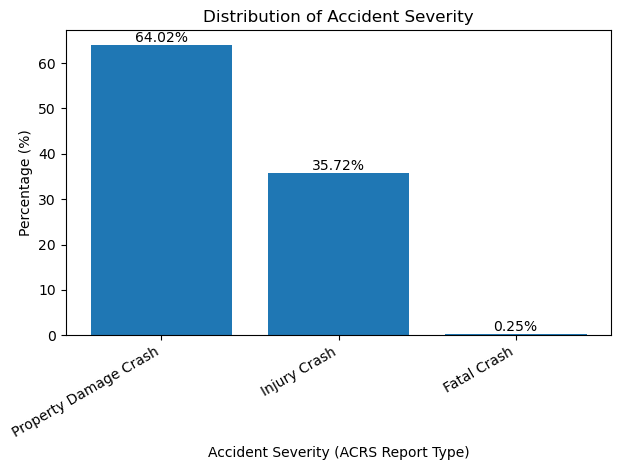

In [933]:
import matplotlib.pyplot as plt

severity_counts = df['ACRS Report Type'].value_counts(normalize=True) * 100

plt.figure()
bars = plt.bar(severity_counts.index, severity_counts.values)

plt.xlabel('Accident Severity (ACRS Report Type)')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Accident Severity')

plt.xticks(rotation=30, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [934]:
df["ACRS Report Type"].value_counts()

ACRS Report Type
Property Damage Crash    131296
Injury Crash              73256
Fatal Crash                 521
Name: count, dtype: int64

In [935]:
df["Injury Severity"].value_counts()

Injury Severity
NO APPARENT INJURY          141196
No Apparent Injury           25377
POSSIBLE INJURY              17481
SUSPECTED MINOR INJURY       11871
Suspected Minor Injury        2843
Possible Injury               2241
SUSPECTED SERIOUS INJURY      1414
Suspected Serious Injury       271
FATAL INJURY                   154
Fatal Injury                    32
Name: count, dtype: int64

#### ביצענו הורדת עמודות על עמודות שאינן רלוונטיות או תורמות למודל

In [937]:
columns_to_drop = [
    "Report Number",
    "Local Case Number",
    "Road Name",
    "Cross-Street Name",
    "Vehicle ID",
    "Latitude",
    "Longitude",
    "Person ID",
    "Off-Road Description",
    "Related Non-Motorist",
    "Vehicle Model",
    "Drivers License State",
    "Municipality",
    "Circumstance"
]
df = df.drop(columns=columns_to_drop)

In [938]:
vals = df["Vehicle Body Type"].dropna().unique().tolist()
for v in vals:
    print(v)

Passenger Car
Van - Passenger (&lt;9 Seats)
Sport Utility Vehicle
Other Trucks
Bus - Transit
Pickup
Other
Motorcycle - 2 Wheeled
Bus - Other Type
Station Wagon
Truck Tractor
Bus - School
Single-Unit Truck
Bus - Mini
Van - Cargo
Unknown
Moped Or motorized bicycle
All-Terrain Vehicle/All-Terrain Cycle (ATV/ATC)
Low Speed Vehicle
Autocycle
Van - Passenger (9 or 12 Seats)
Construction Equipment (backhoe, bulldozer, etc.)
OTHER
PASSENGER CAR
(SPORT) UTILITY VEHICLE
POLICE VEHICLE/EMERGENCY
VAN
TRANSIT BUS
AMBULANCE/EMERGENCY
OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)
MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))
UNKNOWN
CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))
SNOWMOBILE
POLICE VEHICLE/NON EMERGENCY
SCHOOL BUS
AMBULANCE/NON EMERGENCY
PICKUP TRUCK
TRUCK TRACTOR
MOTORCYCLE
RECREATIONAL VEHICLE
FIRE VEHICLE/EMERGENCY
STATION WAGON
OTHER BUS
MOPED
CROSS COUNTRY BUS
ALL TERRAIN VEHICLE (ATV)
FIRE VEHICLE/NON EMERGENCY
AUTOCYCLE
FARM VEHICLE
LOW SPEED VEHICLE
LIMOU

#### העברת כל הדאטה לאותיות קטנות על מנת למנוע כפילויות מיותרות

In [940]:
pd.set_option('display.max_rows', None)
df = df.apply(lambda col: col.str.lower() if col.dtype == 'object' else col)

#### טיפול ברווחים כפולים

In [942]:

def remove_double_spaces(df):
    return df.apply(
        lambda col: col.str.replace(r'\s+', ' ', regex=True).str.strip() 
        if col.dtype == 'object' else col
    )

df = remove_double_spaces(df)

#### כרינו מעמודת התאריך והשעה את הנתונים הרלוונטיים לנו ושמנו בעמודות חדשות

In [944]:

df['Crash Date/Time'] = pd.to_datetime(
    df['Crash Date/Time'],
    format="%m/%d/%Y %I:%M:%S %p",
    errors='coerce'
)

df['Crash Date'] = df['Crash Date/Time'].dt.date

df['Crash Time'] = df['Crash Date/Time'].dt.time

df['Crash Hour'] = df['Crash Date/Time'].dt.hour

df['Crash Weekday'] = df['Crash Date/Time'].dt.weekday

df['Weekend'] = df['Crash Weekday'].apply(lambda x: 1 if x >= 5 else 0)

print(df[['Crash Date/Time', 'Crash Date', 'Crash Time', 'Crash Hour', 'Crash Weekday', 'Weekend']].head())


      Crash Date/Time  Crash Date Crash Time  Crash Hour  Crash Weekday  \
0 2025-08-21 17:21:00  2025-08-21   17:21:00          17              3   
1 2025-08-22 10:44:00  2025-08-22   10:44:00          10              4   
2 2025-07-25 11:55:00  2025-07-25   11:55:00          11              4   
3 2025-08-22 10:36:00  2025-08-22   10:36:00          10              4   
4 2025-08-03 14:10:00  2025-08-03   14:10:00          14              6   

   Weekend  
0        0  
1        0  
2        0  
3        0  
4        1  


In [945]:

def time_of_day(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time of Day'] = df['Crash Hour'].apply(time_of_day)


In [946]:

def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Crash Date/Time'].dt.month.apply(season)


In [947]:
vals = df["ACRS Report Type"].dropna().unique().tolist()
for v in vals:
    print(v)

injury crash
property damage crash
fatal crash


In [948]:

map_Direction= {
    "northbound": "north",
    "southbound": "south",
    "unknown": "unknown",
    "eastbound": "east",
    "westbound" :"west",
    "not on roadway": "not on roadway",
    "west": "west",
    "east": "east",
    "south": "south",
    "north": "north"
}
df["Vehicle Going Dir"]=df["Vehicle Going Dir"].map(map_Direction)


In [949]:

def map_vehicle_movement(x):
    if pd.isna(x):
        return "unknown"


    turning = [
        "turning left", "turning right", "making left turn",
        "making right turn", "making u-turn", "making u turn",
        "right turn on red","turning"
    ]

    lane_change = [
        "changing lanes", "leaving traffic lane",
        "entering traffic lane", "starting from lane"
    ]

    speed_change = [
        "slowing or stopping", "accelerating",
        "stopped in traffic", "stopped in traffic lane",
        "starting from parked"
    ]

    passing = [
        "overtaking/passing", "passing"
    ]

    straight = [
        "moving constant speed", "negotiating a curve",
        "skidding"
    ]

    parking = [
        "parked", "parking"
    ]

    reversing = [
        "backing"
    ]
    unknown = ["driverless moving veh","driverless moving veh.", "other","unknown"]
    if x in turning:
        return "turning"
    if x in lane_change:
        return "lane_change"
    if x in speed_change:
        return "speed_change"
    if x in passing:
        return "passing"
    if x in straight:
        return "straight_driving"
    if x in parking:
        return "parking"
    if x in reversing:
        return "reversing"
    if x in unknown:
        return "unknown"

df["Vehicle Movement"] = df["Vehicle Movement"].apply(map_vehicle_movement)


In [950]:
def map_vehicle_type(x):
    if pd.isna(x):
        return "unknown"

    passenger = [
        "passenger car", "pickup", "pickup truck", "sport utility vehicle",
        "(sport) utility vehicle", "station wagon", "van", "van - passenger (<9 seats)",
        "van - cargo",
         "limousine"
    ]

    motorcycle = [
        "motorcycle", "motorcycle - 2 wheeled", "motorcycle - 3 wheeled",
        "moped", "moped or motorized bicycle", "autocycle"
    ]

    truck = [
        "single-unit truck", "truck tractor", "other trucks","cargo van/light truck 2 axles (over 10,000lbs (4,536 kg))",
        "medium/heavy trucks 3 axles (over 10,000lbs (4,536kg))","other light trucks (10,000lbs (4,536kg) or less)"
    ]

    bus = [
        "bus - transit", "transit bus", "bus - mini", "bus - school",
        "school bus", "bus - other type", "other bus","van - passenger (15 seats)","van - passenger (9 or 12 seats)",
        "bus - cross country", "cross country bus"
    ]

    emergency = [
        "police vehicle/non emergency", "police vehicle/emergency",
        "ambulance/emergency", "ambulance/non emergency",
        "fire vehicle/emergency", "fire vehicle/non emergency"
    ]

    off_road = [
        "all-terrain vehicle/all-terrain cycle (atv/atc)",  "golf cart" ,"low speed vehicle",
        "all terrain vehicle (atv)", "recreational off-highway vehicles (rov)",
        "snowmobile", "recreational vehicle", "construction equipment (backhoe, bulldozer, etc.)",
        "farm equipment (tractor, combine harvester, etc.)", "farm vehicle"
    ]

    if x in passenger:
        return "passenger"
    if x in motorcycle:
        return "motorcycle"
    if x in truck:
        return "truck"
    if x in bus:
        return "bus"
    if x in emergency:
        return "emergency"
    if x in off_road:
        return "off_road"
    
    return "other"

df["Vehicle Body Type"] = df["Vehicle Body Type"].apply(map_vehicle_type)


In [951]:
def map_impact(x):
    if pd.isna(x):
        return "unknown"

    front = ["twelve o clock", "twelve oclock", "11 o clock", "eleven o clock", "1 o clock", "one o clock" ,"front" ]
    rear  = ["six o clock", "six oclock", "5 o clock", "five o clock", "7 o clock", "seven o clock", "rear"]
    right = ["3 o clock", "three o clock", "2 o clock", "two o clock", "4 o clock", "four o clock","right" ]
    left  = ["9 o clock", "nine o clock", "8 o clock", "eight o clock", "10 o clock", "ten o clock", "ten oclock" ,"left"]
    other = ["cargo loss","other"]
    roof  = ["top", "roof top","roof"]
    none  = ["non-collision","none"]
    under = ["underside","under"]
    

    if x in front:
        return "front"
    if x in rear:
        return "rear"
    if x in right:
        return "right"
    if x in left:
        return "left"
    if x in roof:
        return "roof"
    if x in none:
        return "none"
    if x in under:
        return "under"
    return "unknown"

df["Vehicle First Impact Location"] = df["Vehicle First Impact Location"].apply(map_impact)


In [952]:

def map_distraction(x):
    if pd.isna(x):
        return "unknown"

    phone = [
        "texting from a cellular phone",
        "talking or listening to cellular phone",
        "dialing cellular phone",
        "other cellular phone related",
    ]

    mess_around = [
        "manually operating (dialing, playing game, etc.)",
        "other electronic device (navigational palm pilot)",
        "using device object brought into vehicle",
        "by other occupants",
        "using other device controls integral to vehicle",
        "adjusting audio and or climate controls",
        "eating or drinking",
        "smoking related",
    ]

    outside = [
        "distracted by outside person object or event",
        "by moving object in vehicle"
    ]

    lost_focus = [
        "looked but did not see",
        "inattentive or lost in thought"
    ]

    safe_list = [
        "not distracted",
        "no driver present"
    ]

 
    if x in phone:
        return "phone"
    if x in mess_around:
        return "mess_around"
    if x in outside:
        return "outside"
    if x in lost_focus:
        return "lost_focus"
    if x in safe_list:
        return "not_distracted"
    
  
    return "unknown"

df["Driver Distracted By Clean"] = df["Driver Distracted By"].apply(map_distraction)

print("--- Distribution of Distraction Categories ---")
counts = df["Driver Distracted By Clean"].value_counts()
print(counts)

print("\n--- Percentage ---")
print(df["Driver Distracted By Clean"].value_counts(normalize=True) * 100)

--- Distribution of Distraction Categories ---
Driver Distracted By Clean
not_distracted    128768
unknown            47193
lost_focus         25866
mess_around         1295
outside             1182
phone                769
Name: count, dtype: int64

--- Percentage ---
Driver Distracted By Clean
not_distracted    62.791299
unknown           23.012781
lost_focus        12.613069
mess_around        0.631482
outside            0.576380
phone              0.374988
Name: proportion, dtype: float64


In [953]:
substance_map2 = {

    # NONE
    "not suspect of alcohol use, not suspect of drug use": "none",
    "none detected": "none",
    "not suspect of alcohol use, not suspect of drug use, not suspect of alcohol use, not suspect of drug use": "none",
    "not suspect of alcohol use, not suspect of drug use, not suspect of alcohol use, not suspect of drug use, not suspect of alcohol use, not suspect of drug use": "none",
    "unknown": "none",
    "unknown, unknown": "none",
    "not suspect of alcohol use, unknown": "none",
    "none detected, unknown": "none",
    "n/a, none detected": "none",
    "unknown, unknown, unknown, not suspect of drug use": "none",
    "n/a, unknown": "none",
    "unknown, not suspect of drug use": "none",
    

    # ALCOHOL
    "suspect of alcohol use, not suspect of drug use": "alcohol",
    "alcohol present": "alcohol",
    "alcohol contributed": "alcohol",
    "alcohol contributed, alcohol present": "alcohol",
    "alcohol present, none detected": "alcohol",
    "suspect of alcohol use, unknown": "alcohol",

    # DRUGS
    "not suspect of alcohol use, suspect of drug use": "drugs",
    "illegal drug present": "drugs",
    "illegal drug contributed": "drugs",
    "medication present": "drugs",

    # COMBINATION
    "suspect of alcohol use, suspect of drug use": "combination",
    "combined substance present": "combination",
    "combination contributed": "combination",

    # UNKNOWN

    
    "other": "unknown"
}
df["Non-Motorist Substance Abuse"] = df["Non-Motorist Substance Abuse"].map(substance_map2)

In [955]:
substance_map = {

    # NONE
    "not suspect of alcohol use, not suspect of drug use": "none",
    "none detected": "none",
    "unknown": "none",
    "unknown, unknown": "none",
    "unknown, not suspect of drug use": "none",
    "not suspect of alcohol use, unknown": "none",

    # ALCOHOL
    "suspect of alcohol use, not suspect of drug use": "alcohol",
    "alcohol present": "alcohol",
    "alcohol contributed": "alcohol",
    "suspect of alcohol use, unknown": "alcohol",

    # DRUGS
    "not suspect of alcohol use, suspect of drug use": "drugs",
    "illegal drug present": "drugs",
    "illegal drug contributed": "drugs",
    "medication present": "drugs",
    "medication contributed": "drugs",
    "unknown, suspect of drug use": "drugs",

    # COMBINATION
    "suspect of alcohol use, suspect of drug use": "combination",
    "combined substance present": "combination",
    "combination contributed": "combination",

    # UNKNOWN
    
    
    "other": "unknown"
}

df["Driver Substance Abuse"] = df["Driver Substance Abuse"].map(substance_map)

In [956]:
map_tc = {

    #רמזור\תמרור
    "traffic control signal": "signal",
    "traffic signal": "signal",
    "flashing traffic control signal": "signal",
    "flashing traffic signal": "signal",
    "lane use control signal": "signal",
    "ramp meter signal": "signal",
    "other signal": "signal",
    "stop sign": "sign",
    "yield sign": "sign",
    "pedestrian crossing sign": "sign",
    "bicycle crossing sign": "sign",
    "warning sign": "sign",
    "other warning sign": "sign",
    "other pavement marking (excluding edgelines, centerlines, or lane lines)": "sign",
    "intersection ahead warning sign": "sign",
    "curve ahead warning sign": "sign",
    "reduce speed ahead warning sign": "sign",
    "pedestrian crossing": "sign",

    # HUMAN – אדם שמכוון
    "person": "human",
    "person (including flagger, law enforcement, crossing guard, etc.)": "human",


    # SPECIAL – רכבת / מיוחדים
    "railway crossing device": "special",
    "flashing railroad crossing signal (may include gates)": "special",
    "school zone sign": "special",
    "school zone sign device": "special",

    # ללא רמזור  
    "no controls": "no controls",

    
    "other": "unknown",
    "unknown": "unknown"
}

df["Traffic Control"] = df["Traffic Control"].map(map_tc)

In [957]:
mapping_light = {
    'dusk': 'twilight',
    'dawn': 'twilight',
    "daylight":"daylight",
    'dark lights on': 'dark lighted',
    'dark - lighted': 'dark lighted',
    'dark - not lighted': 'dark not lighted',
    'dark no lights': 'dark not lighted',
    'dark -- unknown lighting': 'dark unknown lighting',
    'dark - unknown lighting':'dark unknown lighting',
    'unknown':'unknown',
    'other':'unknown'
}
df['Light'] = (df['Light'].map(mapping_light).fillna("unknown"))

In [958]:
df['Light'].value_counts()

Light
daylight                 139620
dark lighted              46744
twilight                   8165
dark not lighted           6073
unknown                    2703
dark unknown lighting      1768
Name: count, dtype: int64

In [959]:
def map_surface(x):
    
    if pd.isna(x):
        return "unknown"

    
    if x == "dry":
        return "dry"

    if x in ["wet", "water (standing, moving)", "water(standing/moving)"]:
        return "wet"
        
    if x == "oil":
        return "oil"
        
    if x in ["snow", "slush"]:
        return "snow"

    if x in ["ice", "ice/frost", "frost"]:
        return "ice"

    if x in ["mud, dirt, gravel", "sand"]:
        return "loose"

    if x in ["unknown", "other"]:
        return "unknown"
        

df["Surface Condition"] = df["Surface Condition"].apply(map_surface)

In [960]:
df['Surface Condition'].value_counts()

Surface Condition
dry        145174
wet         33087
unknown     24090
snow         1416
ice          1216
loose          61
oil            29
Name: count, dtype: int64

In [961]:
map_weather = {"clear":"clear",
             "rain":"rain" ,
             "fog, smog, smoke": "fog / smog",
             "cloudy" : "cloudy" ,
             "severe crosswinds"  : "windy" ,
             "raining" : "rain" ,
             "snow" : "snow / ice",
             "freezing rain or freezing drizzle" : "snow / ice",
             "foggy" : "fog / smog",
             "other" : "other",
             "unknown" : "unknown",
             "wintry mix" : "snow / ice",
             "severe winds" : "windy",
             "sleet" : "snow / ice",
             "blowing snow" : "snow / ice",
             "blowing sand, soil, dirt" : "windy",
             "sleet or hail" : "snow / ice"}
df["Weather"]=(df["Weather"].map(map_weather))           

#### השלמת מזג האוויר בחודשי הקיץ לבהיר

In [962]:
def fill_weather_conservative(row):
    weather = row["Weather"]
    season = row["Season"]

    if pd.notna(weather) and weather !="unknown" :
        return weather
    
    if season == "Summer":
        return "clear"
    
    return weather

df["Weather"] = df.apply(fill_weather_conservative, axis=1)

#### במקרה ומזג האוויר לא ידוע ובאותו יום היתה תאונה נוספת החלפנו את ה"לא ידוע" במידע שיש

In [963]:

weather_mode_per_day = df.groupby("Crash Date")["Weather"].agg(lambda x: x.mode().iloc[0] if x.dropna().size > 0 else np.nan)

def fill_weather_by_date(row):
    if pd.isna(row["Weather"]):
        return weather_mode_per_day[row["Crash Date"]]
    return row["Weather"]

df["Weather"] = df.apply(fill_weather_by_date, axis=1)

In [964]:

df['Weather'] = df['Weather'].replace(['UNKNOWN', 'Unknown', 'N/A', 'nan', 'unknown'], np.nan)

weather_mode_per_day = df.groupby("Crash Date")["Weather"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)

df['Weather'] = df['Weather'].fillna(df['Crash Date'].map(weather_mode_per_day))

df['Weather'] = df['Weather'].fillna('Unknown')

print("Distribution after fixing:")
print(df['Weather'].value_counts())

Distribution after fixing:
Weather
clear         155643
rain           24952
cloudy         20523
snow / ice      2638
fog / smog       750
other            370
windy            197
Name: count, dtype: int64


#### צמצום לשנים הגיוניות

In [965]:
def clean_year(y):
    try:
        y = int(y)
    except:
        return np.nan

    if y < 1900 or y > 2026:
        return np.nan

    return y

df['Vehicle Year'] = df['Vehicle Year'].apply(clean_year)

#### תיקון טעויות כתיב במילוי יצרן הרכב וצימצום ל30 החברות שמופיעות הכי הרבה בדאטה על מנת להקל בקידוד

In [966]:
def clean_vehicle_make(make):
    if pd.isna(make):
        return "unknown"

    mapping = {
        'toyt': 'toyota',
        'toyo': 'toyota',
        'hond': 'honda',
        'niss': 'nissan',
        'chev': 'chevrolet',
        'chevy': 'chevrolet',
        'frd': 'ford',
        'hyun': 'hyundai',
        'merz': 'mercedes',
        'mercedes benz': 'mercedes',
        'mercedez': 'mercedes',
        'volks': 'volkswagen',
        'vw': 'volkswagen',
        'dodg': 'dodge',
        'mazd': 'mazda',
        'mits': 'mitsubishi',
        'sub': 'subaru',
        'suba': 'subaru',
        'infi': 'infiniti',
        'infinity': 'infiniti',
        'acur': 'acura',
        'lexu': 'lexus',
        'cadi': 'cadillac',
        'volv': 'volvo',
        'chrys': 'chrysler',
        'linc': 'lincoln',
        'pont': 'pontiac',
        'bk': 'buick',
        'buic': 'buick'
    }

    return mapping.get(make, make)

df['Vehicle Make'] = df['Vehicle Make'].apply(clean_vehicle_make)

top_makes = df['Vehicle Make'].value_counts().nlargest(30).index
df['Vehicle Make'] = df['Vehicle Make'].apply(lambda x: x if x in top_makes else 'other')

print(df['Vehicle Make'].value_counts())

Vehicle Make
toyota        38535
honda         29394
other         23045
ford          20166
nissan        13048
chevrolet     12506
hyundai        7313
dodge          6043
unknown        4689
jeep           4536
acura          4465
bmw            4011
lexus          4009
subaru         3973
mazda          3493
mercedes       3469
kia            3407
gmc            2167
volkswagen     1996
audi           1692
thomas         1569
volvo          1476
infiniti       1408
chrysler       1226
gillig         1163
mitsubishi     1125
cadillac       1068
volk           1068
gill           1044
buick           994
new flyer       975
Name: count, dtype: int64


#### רצינו לעצור רגע לראות את כל הנתונים שוב אחרי על הפעולות שביצענו

In [967]:

def profile_df(df):
    info = []
    for col in df.columns:
        s = df[col]
        info.append({
            'column': col,
            'dtype': s.dtype,
            'missing_count': s.isna().sum(),
            'missing_pct': s.isna().mean(),
            'n_unique': s.nunique(dropna=True),
            'top_values': s.value_counts(dropna=True).head(5).to_dict()
        })
    return pd.DataFrame(info)

profile = profile_df(df)
profile


,column,dtype,missing_count,missing_pct,n_unique,top_values
0,Agency Name,object,0,0.000000,10,"{'montgomery county police': 138376, 'montgome..."
1,ACRS Report Type,object,0,0.000000,3,"{'property damage crash': 131296, 'injury cras..."
2,Crash Date/Time,datetime64[ns],0,0.000000,112771,"{2018-12-10 18:10:00: 11, 2020-06-09 18:53:00:..."
3,Route Type,object,20074,0.097887,19,"{'maryland (state)': 77077, 'county': 55574, '..."
4,Collision Type,object,585,0.002853,25,"{'same dir rear end': 55759, 'straight movemen..."
5,Weather,object,0,0.000000,7,"{'clear': 155643, 'rain': 24952, 'cloudy': 205..."
6,Surface Condition,object,0,0.000000,7,"{'dry': 145174, 'wet': 33087, 'unknown': 24090..."
7,Light,object,0,0.000000,6,"{'daylight': 139620, 'dark lighted': 46744, 't..."
8,Traffic Control,object,28562,0.139277,6,"{'no controls': 84059, 'signal': 72604, 'sign'..."
9,Driver Substance Abuse,object,31320,0.152726,5,"{'none': 166501, 'alcohol': 6399, 'drugs': 591..."


#### בתאים הבאים צמצנו את סוגי הכבישים, מצאנו חציון עבור כל סוג ובמקום שיש ערך "לא ידוע" בהגבלת המהירות אך ידוע סוג הכביש מילאנו את החציון

In [968]:

mapping = {
    "county route": "main collector",
    "us (state)": "main collector",
    "maryland (state) route": "main collector",
    "interstate (state)": "high way",
    "municipality route": "local slow",
    "local route": "local slow",
    "maryland (state)": "main collector",

    "municipality": "local slow",
    "county": "main collector",
    "other public roadway": "other public roadway",

    "private route": "local slow",
    "service road": "local slow",

    "spur": "main collector",
    "ramp": "main collector",
    "bicycle route": "local slow",
    "crossover": "main collector",

    "government route": "local slow",
    "government": "local slow",

    "unknown": "unknown"
}

df["Route Type"] = (
    df["Route Type"] 
    .map(mapping)                          
)


In [969]:
df["Speed Limit"] = df["Speed Limit"].replace(0, np.nan)

In [970]:
medians = df.groupby("Route Type")["Speed Limit"].median().dropna()
medians

Route Type
high way                55.0
local slow              25.0
main collector          35.0
other public roadway    30.0
unknown                 15.0
Name: Speed Limit, dtype: float64

In [971]:
median_to_route = {v: k for k, v in medians.items()}

def fill_route_by_speed(row):
    rtype = row["Route Type"]
    speed = row["Speed Limit"]
    
    if pd.notna(rtype):
        return rtype
    
    if pd.notna(speed) and speed in median_to_route:
        return median_to_route[speed]
    
    return "unknown"

df["Route Type"] = df.apply(fill_route_by_speed, axis=1)


def fill_speed_by_route(row):
    speed = row["Speed Limit"]
    rtype = row["Route Type"]
    
    if pd.notna(speed):
        return speed
    
    if rtype in medians:
        return medians[rtype]
    
df["Speed Limit"] = df.apply(fill_speed_by_route, axis=1)

In [972]:
def clean_collision_type(x):
    if pd.isna(x):
        return "other"

    rear = [
        "front to rear", "rear to rear", "same dir rear end",
        "same dir rend left turn", "same dir rend right turn"
    ]

    sideswipe = [
        "sideswipe, opposite direction", "sideswipe, same direction",
        "same direction sideswipe", "opposite direction sideswipe"
    ]

    angle = [
        "angle", "straight movement angle", "rear to side", 
        "angle meets left turn", "angle meets right turn",
        "angle meets left head on", "same direction left turn",
        "same direction right turn", "same dir both left turn",
        "opposite dir both left turn"
    ]

    headon = [
        "front to front", "head on", "head on left turn"
    ]

    if x == "single vehicle":
        return "single vehicle"

    elif x in rear:
        return "rear end"
    elif x in sideswipe:
        return "sidewipe"
    elif x in angle:
        return "angle"
    elif x in headon:
        return "head on"

    return "other"

df["Collision Type"] = df["Collision Type"].apply(clean_collision_type)
df["Collision Type"].value_counts()

Collision Type
rear end          67507
angle             51205
sidewipe          25434
other             22617
single vehicle    19703
head on           18607
Name: count, dtype: int64

### בדיעבד גילינו שהמנבא העיקרי לתאונה קלה הוא בפשטות חוסר מילוי כל הפרטים בדוח.
### לכן הורדנו מספר עמודות שבהם ניתן לראות שאם השוטר מילא "לא ידוע" זה נבע מעצלנות ולא באמת מחוסר ידע, כמו לדוגמא מזג אוויר
### בכל מקרה לחזות תאונה על בסיס חוסר מילוי פרטים של הדוח זה לא ניבוי אמיתי מהשטח אלא  ניבוי של בדיעבד כי המילוי לוקה בחסר

In [974]:
bias_columns = [
    'Weather',
    'Light',
    'Surface Condition',
    'Traffic Control',
    'Route Type',
    'Vehicle Body Type',
    'Vehicle Make'
]

print(f"Original Row Count: {len(df)}")

for col in bias_columns:
    mask = ~df[col].astype(str).str.lower().str.strip().isin(['unknown', 'n/a', 'nan', 'other'])
    df = df[mask]

df = df.reset_index(drop=True)

print(f"Clean Row Count: {len(df)}")
print("Data is now overwritten and ready for modeling.")

Original Row Count: 205073
Clean Row Count: 136552
Data is now overwritten and ready for modeling.


#### רצינו לבדוק השערה ראשונית שיש הרבה יותר תאונות בחורף

--- תוצאות השוואה: חורף מול קיץ ---
כמות תאונות בחורף: 32689
כמות תאונות בקיץ:  33364
יחס כמותי (קיץ/חורף): 1.02 (על כל תאונת חורף יש 1.0 תאונות קיץ)

אחוז תאונות עם נפגעים בחורף: 37.61%
אחוז תאונות עם נפגעים בקיץ:  41.78%


C:\Users\User\AppData\Local\Temp\ipykernel_10472\725467723.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='Season', y='Severity Rate (%)', palette=['#3498db', '#e74c3c']) # כחול לחורף, אדום לקיץ


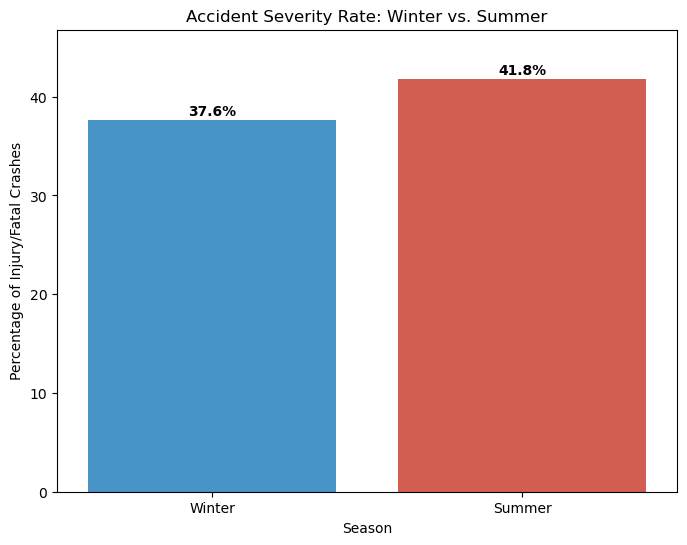

In [975]:
import matplotlib.pyplot as plt
import seaborn as sns

winter_data = df[df['Season'] == 'Winter']
summer_data = df[df['Season'] == 'Summer']

total_winter = len(winter_data)
total_summer = len(summer_data)

def calculate_severity_rate(data):
    if len(data) == 0: return 0
    severe_crashes = data['ACRS Report Type'].apply(
        lambda x: 1 if x in ['injury crash', 'fatal crash'] else 0
    ).sum()
    return (severe_crashes / len(data)) * 100

winter_severity = calculate_severity_rate(winter_data)
summer_severity = calculate_severity_rate(summer_data)

print(f"--- תוצאות השוואה: חורף מול קיץ ---")
print(f"כמות תאונות בחורף: {total_winter}")
print(f"כמות תאונות בקיץ:  {total_summer}")
    
if total_winter > 0:
    print(f"יחס כמותי (קיץ/חורף): {total_summer / total_winter:.2f} (על כל תאונת חורף יש {total_summer / total_winter:.1f} תאונות קיץ)")
else:
    print("יחס כמותי: לא ניתן לחשב (אין נתונים לחורף)")
        
print(f"\nאחוז תאונות עם נפגעים בחורף: {winter_severity:.2f}%")
print(f"אחוז תאונות עם נפגעים בקיץ:  {summer_severity:.2f}%")

comparison_df = pd.DataFrame({
        'Season': ['Winter', 'Summer'],
        'Severity Rate (%)': [winter_severity, summer_severity]
    })

plt.figure(figsize=(8, 6))
sns.barplot(data=comparison_df, x='Season', y='Severity Rate (%)', palette=['#3498db', '#e74c3c']) # כחול לחורף, אדום לקיץ
plt.title('Accident Severity Rate: Winter vs. Summer')
plt.ylabel('Percentage of Injury/Fatal Crashes')
plt.ylim(0, max(winter_severity, summer_severity) + 5) # קצת רווח למעלה
    
for index, row in comparison_df.iterrows():
    plt.text(index, row['Severity Rate (%)'] + 0.5, f"{row['Severity Rate (%)']:.1f}%", ha='center', color='black', fontweight='bold')
        
plt.show()

In [976]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136552 entries, 0 to 136551
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Agency Name                    136552 non-null  object        
 1   ACRS Report Type               136552 non-null  object        
 2   Crash Date/Time                136552 non-null  datetime64[ns]
 3   Route Type                     136552 non-null  object        
 4   Collision Type                 136552 non-null  object        
 5   Weather                        136552 non-null  object        
 6   Surface Condition              136552 non-null  object        
 7   Light                          136552 non-null  object        
 8   Traffic Control                136552 non-null  object        
 9   Driver Substance Abuse         118749 non-null  object        
 10  Non-Motorist Substance Abuse   3130 non-null    object        
 11  

#### טיפול אחרון בערכי NAN אחרונים. בנוסף הורדנו את INJURY SEVERITY כי היא מגלה למודל את התשובה

In [1128]:

df['Vehicle Year'] = df['Vehicle Year'].fillna(df['Vehicle Year'].median())

cols_to_fix = [
    'Driver Substance Abuse',
    'Non-Motorist Substance Abuse',
    'Driver Distracted By',
    'Vehicle Damage Extent',
    'Vehicle Going Dir',
    'Parked Vehicle',
    'Injury Severity'  
]

df[cols_to_fix] = df[cols_to_fix].fillna('UNKNOWN')

print("Total NaN values remaining:", df.isnull().sum().sum())

cols_to_drop = ['ACRS Report Type', 'Injury Severity', 'Agency Name', 'Location', 
                'Crash Date/Time', 'Crash Date', 'Crash Time']

X = df.drop(columns=cols_to_drop, errors='ignore') 

Total NaN values remaining: 0
Final shape of X: (136552, 124)
Final shape of y: (136552,)


<h2 style="color:#003366; border-bottom: 2px solid #003366; padding-bottom: 5px;">
 ניסוי 1: רגרסיה לוגיסטית 
</h2>

In [1131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

df['Target'] = df['ACRS Report Type'].apply(lambda x: 1 if x in ['injury crash', 'fatal crash'] else 0)

In [1133]:
categorical_cols = [
    'Driver Distracted By Clean', 'Surface Condition', 'Weather', 'Light',
    'Vehicle Body Type', 'Collision Type', 'Season', 'Vehicle Make', 
    'Driver Substance Abuse'
]

numeric_cols = ['Speed Limit', 'Crash Hour', 'Vehicle Year']
features = numeric_cols + ['Weekend'] + categorical_cols

X = df[features].copy()
y = df['Target']


num_imputer = SimpleImputer(strategy='median')
X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])
X['Weekend'] = X['Weekend'].fillna(0)

print("NaN check:", X.isnull().sum().sum())

NaN check: 0


In [1135]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [1137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [1139]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n--- Final Results ---")
print(classification_report(y_test, y_pred))


--- Final Results ---
              precision    recall  f1-score   support

           0       0.70      0.45      0.55     16443
           1       0.46      0.70      0.55     10868

    accuracy                           0.55     27311
   macro avg       0.58      0.58      0.55     27311
weighted avg       0.60      0.55      0.55     27311



--- Top 20 Most Influential Features ---
                               Feature  Coefficient
24        Vehicle Body Type_motorcycle     2.114653
59                 Vehicle Make_thomas    -1.491044
31             Collision Type_sidewipe    -1.077813
44                   Vehicle Make_gill    -0.921183
45                 Vehicle Make_gillig    -0.845423
56              Vehicle Make_new flyer    -0.778890
65  Driver Substance Abuse_combination     0.672377
68      Driver Substance Abuse_unknown     0.431496
26         Vehicle Body Type_passenger     0.386609
25          Vehicle Body Type_off_road     0.364873
10             Surface Condition_loose    -0.348512
66        Driver Substance Abuse_drugs     0.344142
23         Vehicle Body Type_emergency    -0.338053
28              Collision Type_head on     0.334636
41               Vehicle Make_chrysler     0.231967
18                       Weather_windy     0.226188
64      Driver Substance Abuse_alcohol    -0.221918
20         Light_dark u

C:\Users\User\AppData\Local\Temp\ipykernel_10472\2421022052.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


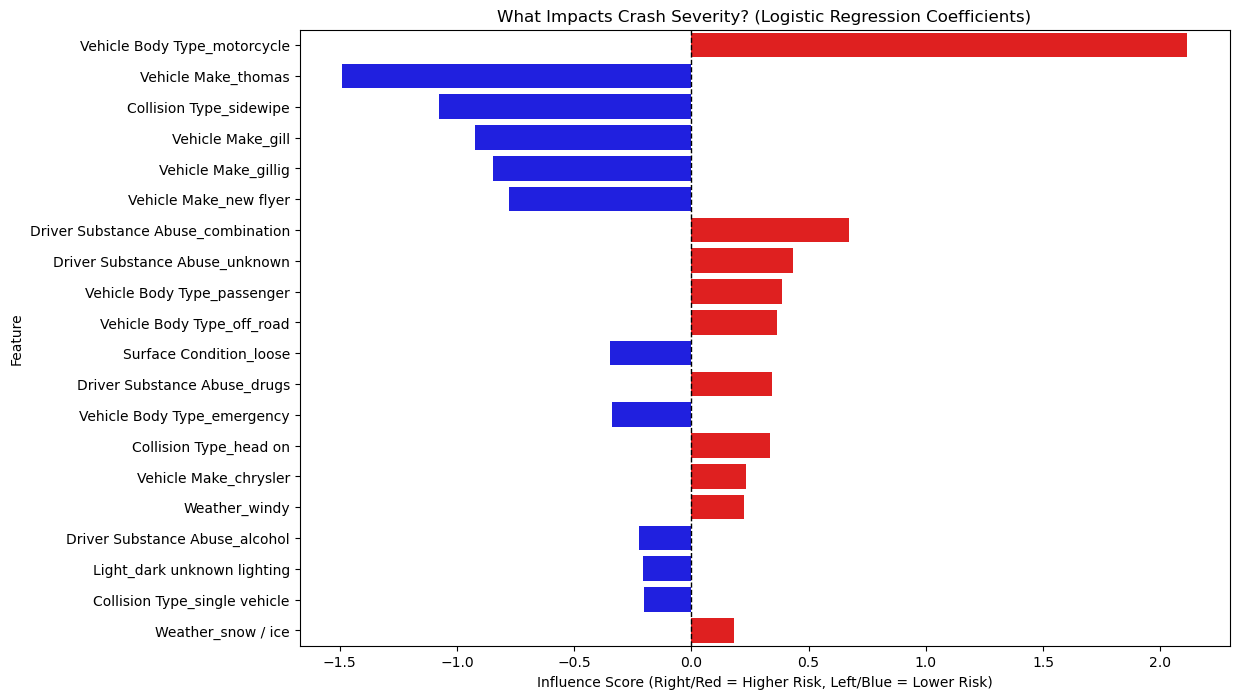

In [983]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,     
    'Coefficient': model.coef_[0]    
})

feature_importance['Abs_Impact'] = feature_importance['Coefficient'].abs()

top_features = feature_importance.sort_values(by='Abs_Impact', ascending=False).head(20)

print("--- Top 20 Most Influential Features ---")
print(top_features[['Feature', 'Coefficient']])

plt.figure(figsize=(12, 8))

colors = ['red' if x > 0 else 'blue' for x in top_features['Coefficient']]

sns.barplot(
    data=top_features, 
    x='Coefficient', 
    y='Feature', 
    palette=colors
)

plt.title('What Impacts Crash Severity? (Logistic Regression Coefficients)')
plt.xlabel('Influence Score (Right/Red = Higher Risk, Left/Blue = Lower Risk)')
plt.axvline(0, color='black', linestyle='--', linewidth=1) # קו האמצע
plt.show()

<h2 style="color:#003366; border-bottom: 2px solid #003366; padding-bottom: 5px;">
ניסוי 2:
Random Forest
</h2>

In [984]:
def clean_categorical(col, top_n=10):
    col = col.astype(str).str.lower().str.strip()
    top_values = col.value_counts().nlargest(top_n).index
    return col.apply(lambda x: x if x in top_values else 'other')

categorical_cols = [
    'Driver Distracted By Clean', 'Surface Condition', 'Weather', 'Light',
    'Vehicle Body Type', 'Collision Type', 'Season', 'Vehicle Make', 
    'Driver Substance Abuse'
]

for col in categorical_cols:
    df[col] = clean_categorical(df[col], top_n=10)

numeric_cols = ['Speed Limit', 'Crash Hour', 'Vehicle Year']
features = numeric_cols + ['Weekend'] + categorical_cols

X = df[features].copy()
y = df['Target']


X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data ready for Random Forest! Train shape: {X_train.shape}")

Data ready for Random Forest! Train shape: (109241, 51)


In [985]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=18,         
    class_weight='balanced',
    random_state=42,
    n_jobs=-1             
)

print("Training Random Forest...")
rf_model.fit(X_train, y_train)
print("Training Completed!")

Training Random Forest...
Training Completed!


In [986]:
y_pred = rf_model.predict(X_test)

print("--- Random Forest Results ---")
print(classification_report(y_test, y_pred))

--- Random Forest Results ---
              precision    recall  f1-score   support

           0       0.71      0.49      0.58     16443
           1       0.47      0.69      0.56     10868

    accuracy                           0.57     27311
   macro avg       0.59      0.59      0.57     27311
weighted avg       0.61      0.57      0.57     27311



C:\Users\User\AppData\Local\Temp\ipykernel_10472\3150336333.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance.head(20), x='Importance', y='Feature', palette='viridis')


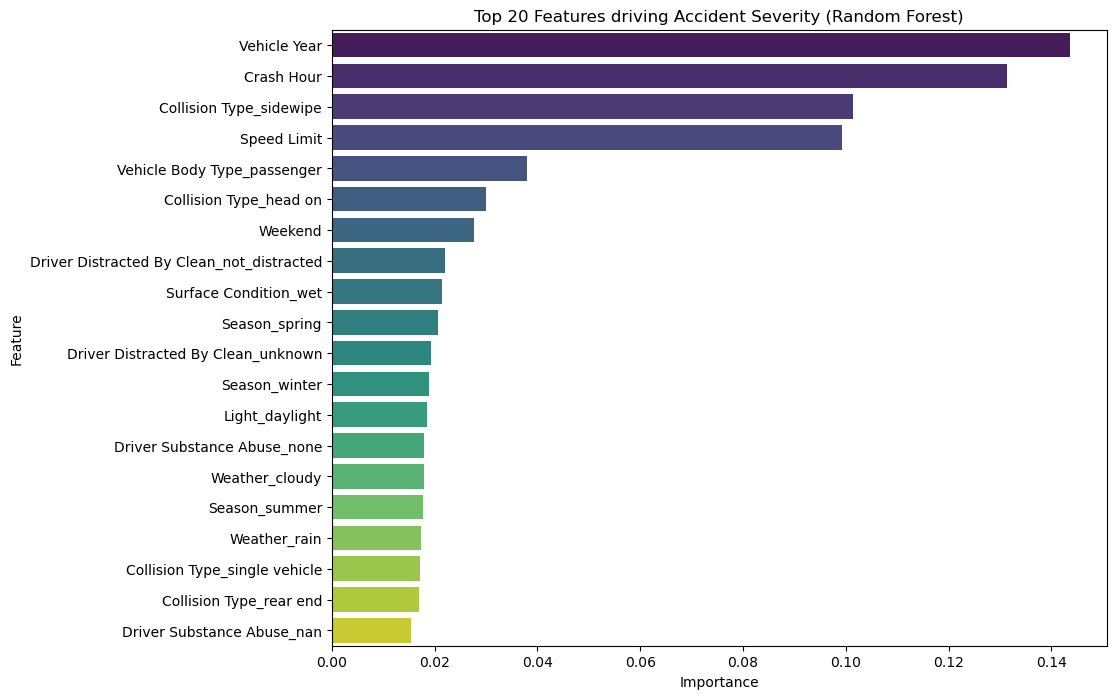

                                      Feature  Importance
2                                Vehicle Year    0.143603
1                                  Crash Hour    0.131343
31                    Collision Type_sidewipe    0.101427
0                                 Speed Limit    0.099231
26                Vehicle Body Type_passenger    0.037944
28                     Collision Type_head on    0.029946
3                                     Weekend    0.027635
5   Driver Distracted By Clean_not_distracted    0.021978
13                      Surface Condition_wet    0.021481
33                              Season_spring    0.020756


In [987]:
importances = rf_model.feature_importances_
feature_names = X.columns

rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=rf_importance.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Features driving Accident Severity (Random Forest)')
plt.show()

print(rf_importance.head(10))

<h2 style="color:#003366; border-bottom: 2px solid #003366; padding-bottom: 5px;">
ניסוי 3: XGBoosting
</h2>

In [988]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [989]:
from xgboost import XGBClassifier

In [990]:

print(f"Imbalance Ratio: {ratio:.2f}")

xgb_model = XGBClassifier(
    n_estimators=100,    
    learning_rate=0.1,    
    max_depth=6,   
    scale_pos_weight=ratio,
    random_state=42,
    n_jobs=-1,             
    eval_metric='logloss' 
)

print("Training XGBoost...")
xgb_model.fit(X_train, y_train)
print("Training Completed!")

Imbalance Ratio: 1.51
Training XGBoost...
Training Completed!


In [991]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,    
    learning_rate=0.05,    
    max_depth=4,          
    min_child_weight=3,   
    scale_pos_weight=1,    
    gamma=0.1,           
    reg_alpha=0.1,      
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

print("Training Optimized XGBoost...")
xgb_model.fit(X_train, y_train)
print("Training Completed!")

from sklearn.metrics import classification_report
y_pred_xgb = xgb_model.predict(X_test)
print("--- Optimized XGBoost Results ---")
print(classification_report(y_test, y_pred_xgb))

Training Optimized XGBoost...
Training Completed!
--- Optimized XGBoost Results ---
              precision    recall  f1-score   support

           0       0.62      0.94      0.75     16443
           1       0.58      0.12      0.19     10868

    accuracy                           0.61     27311
   macro avg       0.60      0.53      0.47     27311
weighted avg       0.60      0.61      0.53     27311



In [992]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_probs = xgb_model.predict_proba(X_test)[:, 1]

print(f"{'Threshold':<10} | {'Recall (Injury)':<15} | {'Precision':<10} | {'Accuracy':<10}")
print("-" * 55)

thresholds = [0.30, 0.35, 0.37, 0.40, 0.42, 0.45, 0.50]

for thresh in thresholds:
    y_pred_loop = (y_probs > thresh).astype(int)
    
    rec = recall_score(y_test, y_pred_loop)
    prec = precision_score(y_test, y_pred_loop)
    acc = accuracy_score(y_test, y_pred_loop)
    
    print(f"{thresh:<10} | {rec:.3f}           | {prec:.3f}     | {acc:.3f}")

print("-" * 55)

Threshold  | Recall (Injury) | Precision  | Accuracy  
-------------------------------------------------------
0.3        | 0.923           | 0.439     | 0.501
0.35       | 0.879           | 0.447     | 0.520
0.37       | 0.846           | 0.451     | 0.529
0.4        | 0.747           | 0.463     | 0.555
0.42       | 0.617           | 0.478     | 0.579
0.45       | 0.372           | 0.510     | 0.608
0.5        | 0.116           | 0.576     | 0.614
-------------------------------------------------------


--- Final XGBoost Model (Threshold 0.4) ---
              precision    recall  f1-score   support

           0       0.72      0.43      0.54     16443
           1       0.46      0.75      0.57     10868

    accuracy                           0.55     27311
   macro avg       0.59      0.59      0.55     27311
weighted avg       0.62      0.55      0.55     27311



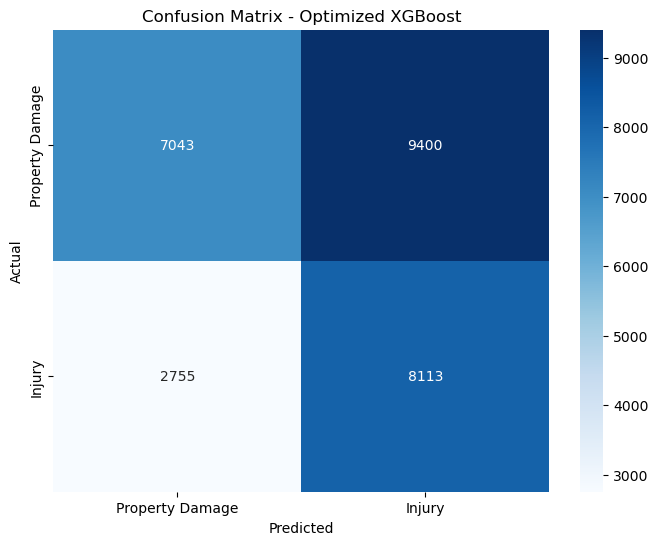

In [1057]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

final_threshold = 0.4

y_probs = xgb_model.predict_proba(X_test)[:, 1]
y_pred_final = (y_probs > final_threshold).astype(int)

print(f"--- Final XGBoost Model (Threshold {final_threshold}) ---")
print(classification_report(y_test, y_pred_final))

cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Property Damage', 'Injury'],
            yticklabels=['Property Damage', 'Injury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized XGBoost')
plt.show()

Top 15 Most Important Features (XGBoost):
                               Feature  Importance
31             Collision Type_sidewipe    0.382794
26         Vehicle Body Type_passenger    0.078324
28              Collision Type_head on    0.048521
24        Vehicle Body Type_motorcycle    0.027650
32       Collision Type_single vehicle    0.022736
27             Vehicle Body Type_truck    0.021830
0                          Speed Limit    0.016967
49         Driver Substance Abuse_none    0.015731
39                  Vehicle Make_honda    0.014695
23         Vehicle Body Type_emergency    0.014125
25          Vehicle Body Type_off_road    0.014016
30             Collision Type_rear end    0.013499
29                Collision Type_other    0.013387
8   Driver Distracted By Clean_unknown    0.012049
43                  Vehicle Make_other    0.011903


C:\Users\User\AppData\Local\Temp\ipykernel_10472\4144319589.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gb_importance.head(15), x='Importance', y='Feature', palette='magma')


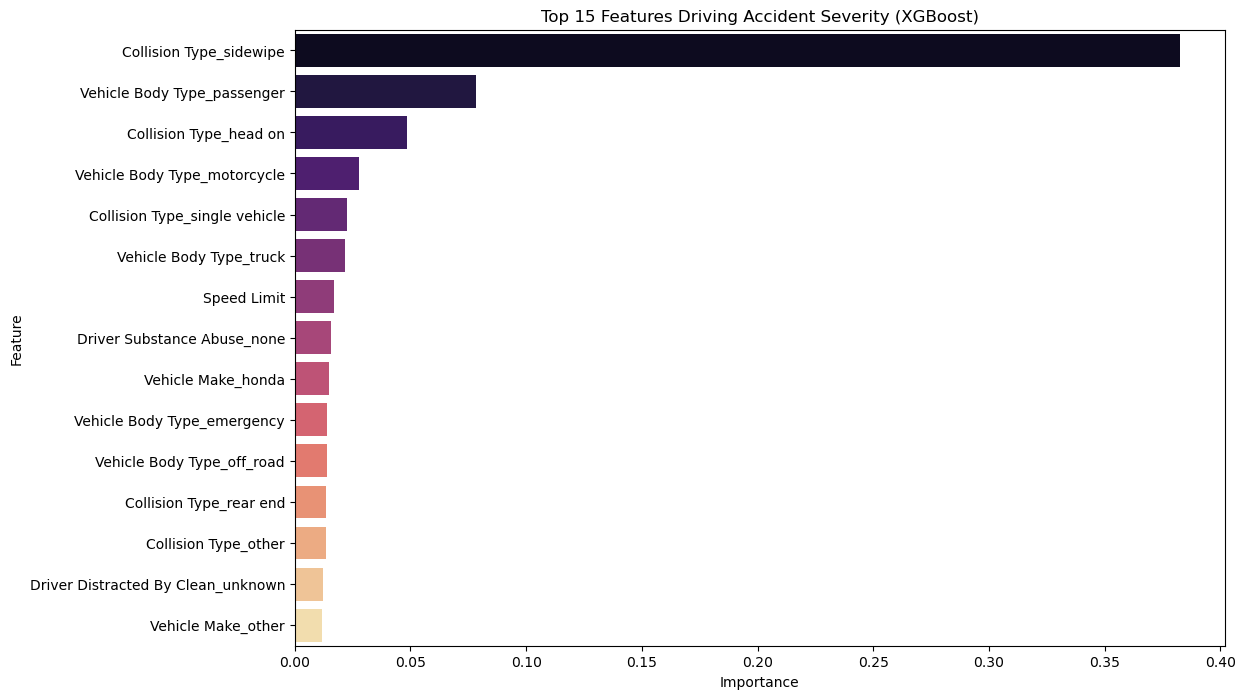

In [755]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns

gb_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

gb_importance = gb_importance.sort_values(by='Importance', ascending=False)

print("Top 15 Most Important Features (XGBoost):")
print(gb_importance.head(15))

plt.figure(figsize=(12, 8))
sns.barplot(data=gb_importance.head(15), x='Importance', y='Feature', palette='magma')
plt.title('Top 15 Features Driving Accident Severity (XGBoost)')
plt.show()

#### בדקנו שאין טעות של הטעית מידע

In [756]:
sideswipe_mask = df['Collision Type'].astype(str).str.lower().str.contains('wipe')

sideswipe_data = df[sideswipe_mask]
other_data = df[~sideswipe_mask]

avg_severity = df['Target'].mean() * 100
sideswipe_severity = sideswipe_data['Target'].mean() * 100 if len(sideswipe_data) > 0 else 0
other_severity = other_data['Target'].mean() * 100

print(f"--- בדיקה חוזרת: תעלומת ה-Sideswipe ---")
print(f"כמות תאונות שזוהו כ-Sideswipe/Sidewipe: {len(sideswipe_data)}")
print(f"Severity in General:       {avg_severity:.2f}%")
print(f"Severity in Sideswipe:     {sideswipe_severity:.2f}%")
print(f"Severity in Others:        {other_severity:.2f}%")

--- בדיקה חוזרת: תעלומת ה-Sideswipe ---
כמות תאונות שזוהו כ-Sideswipe/Sidewipe: 14929
Severity in General:       39.80%
Severity in Sideswipe:     19.18%
Severity in Others:        42.33%


<h2 style="color:#003366; border-bottom: 2px solid #003366; padding-bottom: 5px;">
 ניסוי 4: KNN
</h2>

In [1114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.impute import SimpleImputer

categorical_cols = [
    'Driver Distracted By Clean', 'Surface Condition', 'Weather', 'Light',
    'Vehicle Body Type', 'Collision Type', 'Season', 'Vehicle Make', 
    'Driver Substance Abuse'
]

numeric_cols = ['Speed Limit', 'Crash Hour', 'Vehicle Year']
features = numeric_cols + ['Weekend'] + categorical_cols

X = df[features].copy()
y = df['Target']

num_imputer = SimpleImputer(strategy='median')
X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])

for col in categorical_cols:
    X[col] = X[col].fillna('Unknown')
    
if X.isnull().sum().sum() > 0:
    print("Warning: There are still NaNs in the data!")

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Balancing data...")
train_data = X_train_scaled.copy()
train_data['Target'] = y_train

majority = train_data[train_data['Target'] == 0]
minority = train_data[train_data['Target'] == 1]

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
train_balanced = pd.concat([majority, minority_upsampled])

X_train_final = train_balanced.drop('Target', axis=1)
y_train_final = train_balanced['Target']

print(f"Data Prepared! Train Size: {X_train_final.shape}")

print("Training KNN (this might take a minute)...")
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train_final, y_train_final)
print("Training Completed!")

print("Predicting...")
y_pred = knn_model.predict(X_test_scaled)
print("\n--- KNN Results ---")
print(classification_report(y_test, y_pred))

Balancing data...
Data Prepared! Train Size: (131526, 51)
Training KNN (this might take a minute)...
Training Completed!
Predicting...

--- KNN Results ---
              precision    recall  f1-score   support

           0       0.64      0.57      0.60     16443
           1       0.44      0.52      0.48     10868

    accuracy                           0.55     27311
   macro avg       0.54      0.54      0.54     27311
weighted avg       0.56      0.55      0.55     27311



<h2 style="color:#003366; border-bottom: 2px solid #003366; padding-bottom: 5px;">
ניסוי 5: רשת נוירונים</h2>

In [1141]:

categorical_cols = [
    'Driver Distracted By', 'Surface Condition', 'Weather', 'Light',
    'Vehicle Body Type', 'Collision Type', 'Season',
    'Traffic Control', 'Driver Substance Abuse'
]

#for col in categorical_cols:
#    df[col] = clean_categorical(df[col], top_n=10)

# 2. הכנה ו-One Hot Encoding
numeric_cols = ['Speed Limit', 'Crash Hour', 'Vehicle Year']
features = numeric_cols + ['Weekend'] + categorical_cols
X = df[features].copy()
y = df['Target']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 3. חלוקה ל-Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. נרמול (Scaling) - קריטי לרשת נוירונים!
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# אנחנו מנרמלים את *כל* העמודות (גם ה-0/1) כדי לעזור לרשת להתכנס מהר
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Scaled and Ready for Neural Network!")

Data Scaled and Ready for Neural Network!


In [1143]:
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier


X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train_data = X_train_df.copy()
train_data['Target'] = y_train.values

majority = train_data[train_data['Target'] == 0]
minority = train_data[train_data['Target'] == 1]

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
train_balanced = pd.concat([majority, minority_upsampled])

X_train_final = train_balanced.drop('Target', axis=1)
y_train_final = train_balanced['Target']

# 2. הגדרת רשת הנוירונים
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50), # שתי שכבות: אחת עם 100 נוירונים, השנייה עם 50
    activation='relu',            # הפונקציה ש"מדליקה" נוירונים
    solver='adam',                # האלגוריתם שמתקן את הטעויות (הכי נפוץ)
    alpha=0.0001,                 # רגולריזציה (מונע שינון יתר)
    batch_size=64,                # לומד בקבוצות של 64 תאונות כל פעם
    learning_rate_init=0.001,     # קצב למידה התחלתי
    max_iter=500,                 # מקסימום סיבובים
    random_state=42,
    early_stopping=True           # אם אין שיפור - תעצור (חוסך זמן)
)

print("Training Neural Network...")
mlp_model.fit(X_train_final, y_train_final)
print("Training Completed!")

Training Neural Network...
Training Completed!


In [1145]:
y_pred = mlp_model.predict(X_test_scaled)

print("--- Neural Network (MLP) Results ---")
print(classification_report(y_test, y_pred))

--- Neural Network (MLP) Results ---
              precision    recall  f1-score   support

           0       0.68      0.57      0.62     16443
           1       0.48      0.59      0.53     10868

    accuracy                           0.58     27311
   macro avg       0.58      0.58      0.58     27311
weighted avg       0.60      0.58      0.59     27311



C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  self._parameter_constraints,


In [1157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # בשביל הציור בסוף

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

print("Data scaled and ready for clustering!")

Data scaled and ready for clustering!


#### חיפשנו K אופטימלי

Running Elbow Method (checking optimal K)...


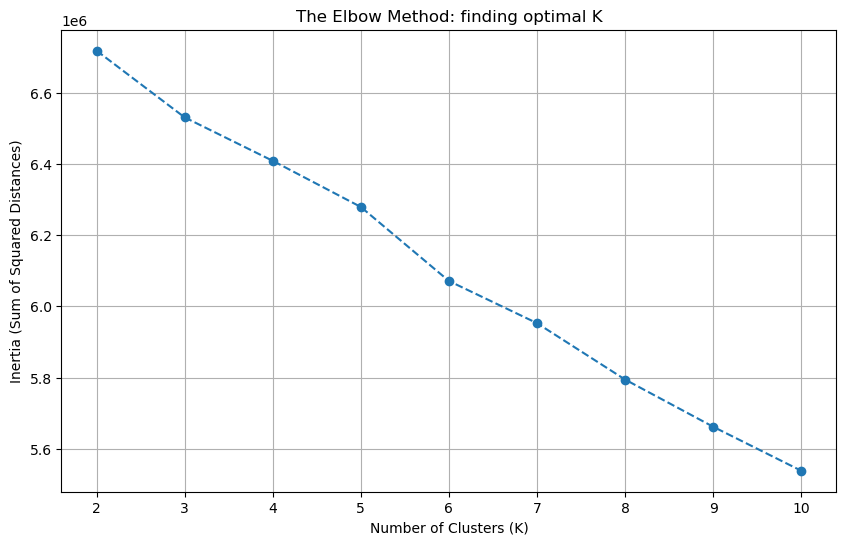

In [848]:
inertia = []
K_range = range(2, 11)

print("Running Elbow Method (checking optimal K)...")

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# ציור הגרף
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('The Elbow Method: finding optimal K')
plt.grid(True)
plt.show()

#### נראה שאין K אופטימלי
#### בחרנו במספר בין 3 ל6

In [1059]:
k_optimal = 4 

kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

print(f"Clustering completed with K={k_optimal}")
print(df['Cluster'].value_counts()) # כמה תאונות יש בכל קבוצה?

Clustering completed with K=4
Cluster
2    58487
0    44319
1    18337
3    15409
Name: count, dtype: int64


In [1061]:
numeric_analysis = df.groupby('Cluster')[['Speed Limit', 'Crash Hour', 'Vehicle Year', 'Target']].mean()
print("--- Numeric Analysis (Averages) ---")
print(numeric_analysis)

print("\n--- Dominant Categories per Cluster ---")
for i in range(k_optimal):
    print(f"\nCluster {i}:")
    cluster_data = df[df['Cluster'] == i]
    
    top_vehicle = cluster_data['Vehicle Body Type'].mode()[0]
    top_col_type = cluster_data['Collision Type'].mode()[0]
    is_severe = cluster_data['Target'].mean() * 100 
    
    print(f"  Most common vehicle: {top_vehicle}")
    print(f"  Most common collision: {top_col_type}")
    print(f"  Severity Rate: {is_severe:.1f}% (Average risk)")

--- Numeric Analysis (Averages) ---
         Speed Limit  Crash Hour  Vehicle Year    Target
Cluster                                                 
0          35.022000   14.381778   2011.298088  0.399783
1          35.004635   13.752795   2010.646603  0.393412
2          34.809445   12.485886   2011.876115  0.397593
3          35.321890   13.506782   2010.922482  0.399766

--- Dominant Categories per Cluster ---

Cluster 0:
  Most common vehicle: passenger
  Most common collision: rear end
  Severity Rate: 40.0% (Average risk)

Cluster 1:
  Most common vehicle: passenger
  Most common collision: rear end
  Severity Rate: 39.3% (Average risk)

Cluster 2:
  Most common vehicle: passenger
  Most common collision: rear end
  Severity Rate: 39.8% (Average risk)

Cluster 3:
  Most common vehicle: passenger
  Most common collision: rear end
  Severity Rate: 40.0% (Average risk)


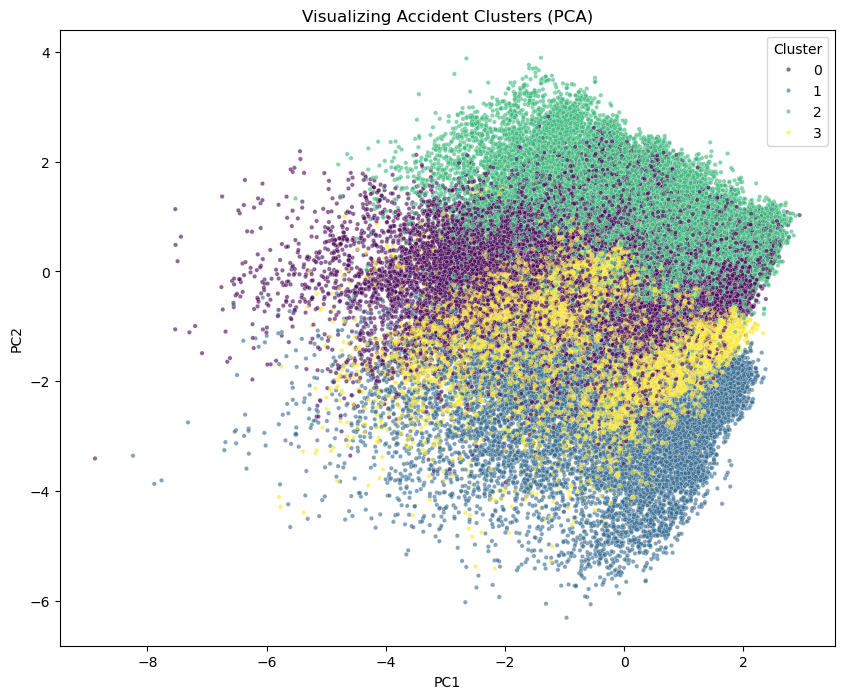

In [1165]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# יצירת דאטה לציור
viz_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
viz_df['Cluster'] = clusters

# הציור
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=viz_df, 
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    palette='viridis', 
    alpha=0.6,
    s=10 # גודל הנקודה
)
plt.title('Visualizing Accident Clusters (PCA)')
plt.show()

In [1069]:
 !pip install mlxtend

In [1081]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

df_rules = X_train.copy()
df_rules['Severity_Injury'] = y_train 

if 'Crash Hour' in df_rules.columns:
    df_rules['Is_Night'] = df_rules['Crash Hour'].apply(lambda x: 1 if (x < 6 or x > 18) else 0)
    df_rules.drop('Crash Hour', axis=1, inplace=True)

if 'Speed Limit' in df_rules.columns:
    df_rules['Is_High_Speed'] = df_rules['Speed Limit'].apply(lambda x: 1 if x > 40 else 0)
    df_rules.drop('Speed Limit', axis=1, inplace=True)

if 'Vehicle Year' in df_rules.columns:
    df_rules['Is_New_Car'] = df_rules['Vehicle Year'].apply(lambda x: 1 if x > 2015 else 0)
    df_rules.drop('Vehicle Year', axis=1, inplace=True)

df_rules = df_rules.astype(bool)

print("Data prepared for Association Rules!")
print(f"Number of columns: {df_rules.shape[1]}")

Data prepared for Association Rules!
Number of columns: 52


In [1083]:
print("Running Apriori algorithm... (this might take a minute)")

frequent_itemsets = apriori(df_rules, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])


Running Apriori algorithm... (this might take a minute)


In [1084]:
def print_readable_rules(rules_df, top_n=10):
    print(f"\n=== Top {top_n} Association Rules (Formatted) ===\n")
    
    for idx, row in rules_df.head(top_n).iterrows():
        antecedents = ", ".join(list(row['antecedents']))
        consequents = ", ".join(list(row['consequents']))
        
        print(f"Rule #{idx+1}:")
        print(f"  IF   [{antecedents}]")
        print(f"  THEN [{consequents}]")
        print(f"  --> Stats: Lift={row['lift']:.2f}, Conf={row['confidence']:.2f}, Support={row['support']:.3f}")
        print("-" * 60)


injury_rules = rules[rules['consequents'].apply(lambda x: 'Severity_Injury' in x)]

if not injury_rules.empty:
    print("Found rules leading specifically to INJURY:")
    print_readable_rules(injury_rules, top_n=10)
else:
    print("No specific injury rules in top threshold, showing all top rules:")
    print_readable_rules(rules, top_n=10)

Found rules leading specifically to INJURY:

=== Top 10 Association Rules (Formatted) ===

Rule #2272:
  IF   [Light_daylight, Vehicle Body Type_passenger, Weather_rain]
  THEN [Severity_Injury, Driver Distracted By Clean_not_distracted, Surface Condition_wet]
  --> Stats: Lift=5.75, Conf=0.29, Support=0.021
------------------------------------------------------------
Rule #2742:
  IF   [Light_daylight, Vehicle Body Type_passenger, Weather_rain]
  THEN [Severity_Injury, Driver Substance Abuse_none, Surface Condition_wet]
  --> Stats: Lift=5.65, Conf=0.35, Support=0.025
------------------------------------------------------------
Rule #1175:
  IF   [Light_daylight, Weather_rain]
  THEN [Severity_Injury, Driver Distracted By Clean_not_distracted, Surface Condition_wet]
  --> Stats: Lift=5.65, Conf=0.28, Support=0.021
------------------------------------------------------------
Rule #2336:
  IF   [Driver Substance Abuse_none, Vehicle Body Type_passenger, Weather_rain]
  THEN [Severity_Inj

In [1175]:
readme_content = """# Traffic Accident Severity Prediction

##  What the project does
This project implements an end-to-end Machine Learning pipeline to analyze and predict the severity of traffic accidents. Based on data from Data.gov, the system classifies accidents into two categories:
1.  **Injury / Fatal** (High Severity)
2.  **Property Damage Only** (Low Severity)

The project includes extensive data cleaning (handling MNAR - Missing Not At Random), feature engineering, supervised modeling (XGBoost, KNN, Logistic Regression, Random Forest, Neural network), and unsupervised modeling (Association rules & K-Means).

## Why the project is useful
Traffic accidents are chaotic events, but they follow statistical patterns. This project is useful for:
* **Emergency Response Optimization:** By predicting severity based on initial reports (weather, vehicle type, collision type), dispatchers can prioritize medical resources for high-risk incidents.
* **Policy Making:** The analysis highlights specific risk factors (e.g., Motorcycle involvement vs. Sideswipes) that can guide infrastructure improvements.
* **Data Integrity:** The project demonstrates a methodology for handling "lazy reporting" (unknown values) in police reports, providing a cleaner dataset for future research.

## How users can get started with the project

### Prerequisites
* Python 3.8 or higher
* Jupyter Notebook

### Installation Steps

1.  **Clone the repository:**
    ```bash
    git clone [https://github.com/aaddii314/Accident.git]
    cd Accident
    ```

2.  **Install dependencies:**
    Ensure you have the `requirements.txt` file in the directory.
    ```bash
    pip install -r requirements.txt
    ```

3.  **Run the analysis:**
    Open the main notebook to view the code, visualizations, and results.
    ```bash
    jupyter notebook ACCIDENT1.ipynb
    ```

## Project Structure
* `data/` - Folder containing the dataset.
* `ACCIDENT1.ipynb` - Main Jupyter Notebook with code and analysis.
* `requirements.txt` - Python dependencies.
* `Course Project.pdf` - Original project guidelines.

This project was created by: Orel Hagai & David Turgeman


*Submitted as the Final Project for the Advanced topics in Machine Learning (Data Mining) Course, 2026.*
"""


with open("README.md", "w", encoding="utf-8") as f:
    f.write(readme_content)

print("Success! 'README.md' has been created in your folder.")

Success! 'README.md' has been created in your folder.


In [ ]:
#pip install -r requirements.txt